# Week 2 Problem Set

## Homeworks

In [1]:
%load_ext nb_mypy
%nb_mypy On

Version 1.0.5


**HW1.** *Min-Heap:* Write the following function to implement *min-heap*. A *min-heap* is a binary heap that satisfies the *min-heap property*. This property can be described as:

    For all nodes except the root:
    
    A[left(i)] >= A[i]
    A[right(i)] >= A[i]

- `min_child(heap, index)`: which returns the index of the node's smallest child. The node you are referring has index of value `index`
- `min_heapify(array, index, size)`: which moves the node at `index` down the tree so as to satisfy the *min-heap property*. The argument `index` is the index of the node you want to start moving down in the array. The argument `size` is the size of the heap. This size may be the same or less than the number of elements in the array. Hint: You may need the `min_child()` function.
- `build_min_heap(array)`: which build a *min-heap* from an arbitrary array of integers. This function should make use of `min_heapify(array, index)`. 

In [2]:
# Copy over the implementations of left_of & right_of from the Cohort qns
def left_of(index: int) -> int:
    return int((index*2)+1)
def right_of(index: int) -> int:
    return int((index+1)*2)

In [3]:
def min_child(heap: list[int|float], index: int, heap_size: int) -> int:
    # If the right child index is out of the heap size, return the left child index
    if right_of(index) >= heap_size:
        return left_of(index)
    else:
        # Compare the values of the left and right children
        if heap[left_of(index)] > heap[right_of(index)]:
            return right_of(index)
        else:
            return left_of(index)

In [4]:
minheap: list[int|float] = [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]
assert min_child(minheap, 0, len(minheap)) == 1
assert min_child(minheap, 2, len(minheap)) == 5
assert min_child(minheap, 3, len(minheap)) == 7
assert min_child(minheap, 1, len(minheap)) == 3
assert min_child(minheap, 4, len(minheap)) == 9


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Reorder the code for min heapify function. The function takes in the array, the index indicating which node to start the heapifying process and the size of the heap. It should modify the input array in such a way that it satisfies the min-heap property starting from the index node.

Input: 
- array: binary tree to be restored to satisfy the min-heap property
- index: index of the node where the min-heapify property should be satisfied on its subtree
- size: number of elements of the binary tree

Output:
- None, the function should modify the array in-place.

Write the code below to test.

In [6]:
def min_heapify(array: list[int|float], index: int, size: int) -> None:
    cur_index = index
    while cur_index < size:
        # Find the index of the smallest child
        min_child_index = min_child(array, cur_index, size)
        # If the smallest child is within the heap and is smaller than the current node, swap them
        if min_child_index < size and array[min_child_index] < array[cur_index]:
            array[min_child_index], array[cur_index] = array[cur_index], array[min_child_index]
        # Move to the next node
        cur_index = min_child_index

In [7]:
array: list[int|float] = [1, 3, 4, 2, 9, 7, 8, 10, 14, 16]
min_heapify(array, 1, len(array))
assert array == [1, 2, 4, 3, 9, 7, 8, 10, 14, 16]


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [9]:
def build_min_heap(array: list[int|float]) -> None:
    # Get the length of the array
    n = len(array)
    # Calculate the starting index for heapifying, which is the parent of the last element
    starting_index = n // 2 - 1 
    # Iterate from the starting index to the root (index 0)
    for current_index in range(starting_index, -1, -1):
        # Heapify the subtree rooted at the current index
        min_heapify(array, current_index, n)

In [10]:
array: list[int|float] = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
print(array)
build_min_heap(array)
print(array)
assert array == [1, 2, 3, 4, 7, 9, 10, 8, 16, 14]


[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
[1, 2, 3, 4, 7, 9, 10, 8, 16, 14]


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW2.** *Heapsort:* Implement heapsort that makes use of *min-heap* instead of *max-heap*. This function returns a *new* array. The strategy is similar to max-heap, but we will use a new array to store the sorted output. Take note of the hints below:
- The top of the min-heap is always the smallest. You can take this element and put it into the output array.
- To find the next minimum, take the last element of the heap and put it into the first element of the array. Now, the tree is no longer a min-heap. Use `min_heapify()` to restore the min-heap property. This will result in a mean-heap where the first element of the array is the next minimum. You can then take out the top of the min-heap and put it into the output array.
- Reduce the heap size as you go.
- Return the new output array.

In [12]:
import random

def gen_random_int(number: int, seed: int) -> list[int]:
    # Initialize an empty list to store the integers
    result = []
    # Populate the list with integers from 0 to number-1
    for i in range(number):
        result += [i]
    # Shuffle the list using the provided seed for reproducibility
    random.Random(seed).shuffle(result)
    return result

In [13]:
def heapsort(array: list[int|float]) -> list[int|float]:
    result: list[int|float] = []
    # Build a min-heap from the input array
    build_min_heap(array)
    # Initialize the position of the end of the heap
    heap_end_pos = len(array) - 1
    # Continue until the heap is reduced to one element
    while heap_end_pos > 0:
        # Swap the root (minimum element) with the last element of the heap
        array[0], array[heap_end_pos] = array[heap_end_pos], array[0]
        # Restore the min-heap property for the reduced heap
        min_heapify(array, 0, heap_end_pos)
        # Reduce the heap size
        heap_end_pos -= 1
    # Return the sorted array in ascending order
    return array[::-1]

In [14]:
from typing import cast
array: list[int] = gen_random_int(10, 100)
array = cast(list[int|float], array)
result: list[int|float] = heapsort(array)
assert result == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**HW3.** Compute the computational time for Heap Sort algorithm implemented in Python for various number of inputs. Make use of `gen_random_int(n)` to generate the input array. Use the template below to generate computation time for different number of inputs: 10, 100, 1000, etc.

In [20]:
import time
from typing import Callable

def run_function(f: Callable[[list[int|float]], list[int|float]], x: list[int|float]) -> float:
    start: float = time.time()
    f(x)
    end: float = time.time()
    return end-start

time_heapsort: list[float] = []
# set the maximum power for 10^power number of inputs
maxpower: int = 5

for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, etc 
    # use seed 100
    array: list[int|float] = gen_random_int(10**n, 100)
    result: float = run_function(heapsort, array)
    time_heapsort.append(result)

print(time_heapsort)

<cell>17: error: Incompatible types in assignment (expression has type "list[int]", variable has type "list[int | float]")  [assignment]
<cell>17: note: "List" is invariant -- see https://mypy.readthedocs.io/en/stable/common_issues.html#variance
<cell>17: note: Consider using "Sequence" instead, which is covariant


[0.0, 0.0, 0.006001710891723633, 0.08500003814697266, 1.1046600341796875]


**HW4.** Plot the output of HW3 by first calculating a new x-axis computed as $n\log_2(n)$. Use the template below.

Reference:
- [Numpy Log2 function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log2.html)

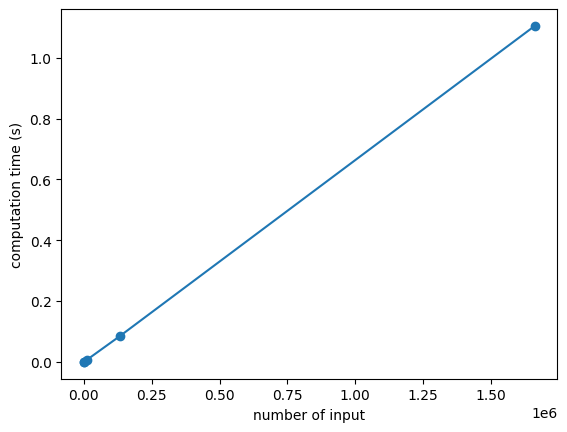

In [23]:
import matplotlib.pyplot as plt
import numpy as np

maxpower: int = 5
# create an iterable from 1 to maxpowers
powers = range(1, maxpower + 1)
# variable num_items stores the number of items to sort
num_items: list[int] = []

# Create a list of num_items for our x axis
for exp in powers:
    num_items.append(10**exp)

# convert to Numpy array
num_items_array = np.array(num_items)

# calculate num_items*log(num_items) for x axis 
x = num_items_array * np.log2(num_items_array)
plt.plot(x, time_heapsort, "-o")
plt.xlabel("number of input")
plt.ylabel("computation time (s)")
plt.show()